In [316]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [317]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [318]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [319]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [320]:
df_airline.dropna(axis=0,inplace=True)

In [321]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [322]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [323]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [324]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [325]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [326]:
df_airline.set_index('Month',inplace=True)

In [327]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

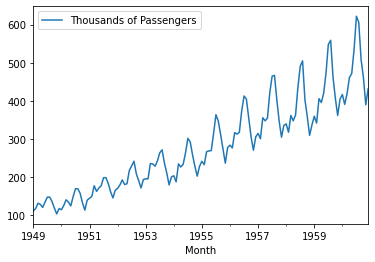

In [328]:
df_airline.plot()

In [329]:
from statsmodels.tsa.stattools import adfuller

In [330]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [331]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060511
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [332]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [333]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [334]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241699883
p- value: 0.054213290283826945
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [335]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [336]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468527
p- value: 2.732891850014085e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [337]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

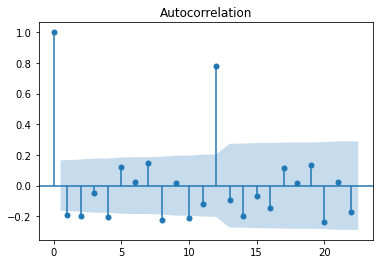

In [338]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

C:\Users\win10\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


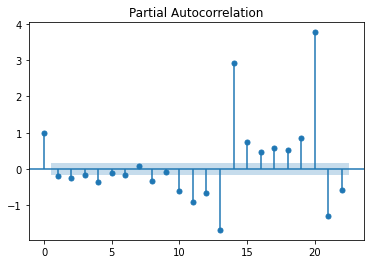

In [339]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

In [340]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0
...,...,...,...
1960-08-01,606.0,-16.0,-103.0
1960-09-01,508.0,-98.0,-82.0
1960-10-01,461.0,-47.0,51.0


In [341]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [342]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [343]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [344]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1956-01-01,284.0,6.0,-35.0
1956-02-01,277.0,-7.0,-13.0
1956-03-01,317.0,40.0,47.0
1956-04-01,313.0,-4.0,-44.0
1956-05-01,318.0,5.0,9.0
1956-06-01,374.0,56.0,51.0
1956-07-01,413.0,39.0,-17.0
1956-08-01,405.0,-8.0,-47.0
1956-09-01,355.0,-50.0,-42.0


In [345]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [346]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0
...,...,...,...
1955-08-01,347.0,-17.0,-66.0
1955-09-01,312.0,-35.0,-18.0
1955-10-01,274.0,-38.0,-3.0


In [350]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(14,0,12))

C:\Users\win10\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\win10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [351]:
model_Arima_fit=model.fit()

C:\Users\win10\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [352]:
model_Arima_fit.summary()

C:\Users\win10\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARMA Model Results                                
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                         ARMA(14, 0)   Log Likelihood                -352.088
Method:                            css-mle   S.D. of innovations              8.837
Date:                     Sun, 27 Feb 2022   AIC                            736.175
Time:                             18:19:09   BIC                            775.068
Sample:                         01-01-1949   HQIC                           751.810
                              - 12-01-1955                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            197.6662        nan        nan        nan         nan         nan
ar.L1.Thousands of Passengers      0.7934   3.87e-06   2.05e+05      0.000       0.793       0.793
ar.L2.Thousands of Passengers      0.1063    8.4e-07   1.26e+05      0.000       0.106       0.106
ar.L3.Thousands of Passengers      0.1028   9.67e-07   1.06e+05      0.000       0.103       0.103
ar.L4.Thousands of Passengers     -0.0461   2.96e-07  -1.56e+05      0.000      -0.046      -0.046
ar.L5.Thousands of Passengers      0.0827   8.01e-07   1.03e+05      0.000       0.083       0.083
ar.L6.Thousands of Passengers     -0.0831   7.85e-07  -1.06e+05      0.000      -0.083      -0.083
ar.L7.Thousands of Passengers      0.0493   9.69e-08   5.08e+05      0.000       0.049       0.049
ar.L8.Thousands of Passengers     -0.1476        nan        nan        nan         nan         nan
ar.L9.Thousands of Passengers      0.2168        nan        nan        nan         nan         nan
ar.L10.Thousands of Passengers    -0.1616   5.01e-07  -3.23e+05      0.000      -0.162      -0.162
ar.L11.Thousands of Passengers     0.1492   3.47e-07    4.3e+05      0.000       0.149       0.149
ar.L12.Thousands of Passengers     0.7962   9.18e-08   8.68e+06      0.000       0.796       0.796
ar.L13.Thousands of Passengers    -0.5613        nan        nan        nan         nan         nan
ar.L14.Thousands of Passengers    -0.2970   3.55e-07  -8.36e+05      0.000      -0.297      -0.297
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0000           -0.0000j            1.0000           -0.0000
AR.2             1.0196           -0.0000j            1.0196           -0.0000
AR.3             0.8672           -0.4980j            1.0000           -0.0830
AR.4             0.8672           +0.4980j            1.0000            0.0830
AR.5             0.4930           -0.8700j            1.0000           -0.1679
AR.6             0.4930           +0.8700j            1.0000            0.1679
AR.7             0.0137           -1.0049j            1.0050           -0.2478
AR.8             0.0137           +1.0049j            1.0050            0.2478
AR.9            -0.4918           -0.8707j            1.0000           -0.3318
AR.10           -0.4918           +0.8707j            1.0000            0.3318
AR.11           -0.8940           -0.4999j            1.0243           -0.4189
AR.12           -0.8940           +0.4999j            1.0243            0.4189
AR.13           -1.1313           -0.0000j            1.1313           -0.5000
AR.14           -2.7543           -0.0000j            2.7543           

In [353]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

C:\Users\win10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [354]:
residuals

Month
1956-01-01     -3.453756
1956-02-01      2.666435
1956-03-01     16.300548
1956-04-01      4.135121
1956-05-01      7.195026
1956-06-01     19.166642
1956-07-01      9.452209
1956-08-01     22.117153
1956-09-01      6.136713
1956-10-01     -3.711161
1956-11-01     -3.664108
1956-12-01     -7.358821
1957-01-01    -10.057620
1957-02-01     -5.565449
1957-03-01     29.889629
1957-04-01      7.870276
1957-05-01     11.558851
1957-06-01     35.000460
1957-07-01     30.545878
1957-08-01     55.769736
1957-09-01     26.674567
1957-10-01      8.260469
1957-11-01     -0.130278
1957-12-01     -5.429500
1958-01-01    -15.172170
1958-02-01    -13.878797
1958-03-01     16.916377
1958-04-01    -16.430717
1958-05-01     -6.811586
1958-06-01     22.128951
1958-07-01     32.331690
1958-08-01     71.581167
1958-09-01      4.751868
1958-10-01     -3.404300
1958-11-01    -20.066407
1958-12-01    -26.669837
1959-01-01    -19.248423
1959-02-01     -9.696774
1959-03-01     46.914564
1959-04-01     12.8

<AxesSubplot:ylabel='Density'>

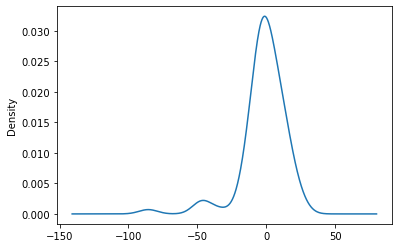

In [355]:
model_Arima_fit.resid.plot(kind='kde')

In [356]:
test_data['Predicted_ARIMA']=pred

C:\Users\win10\AppData\Local\Temp/ipykernel_29152/95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='Month'>

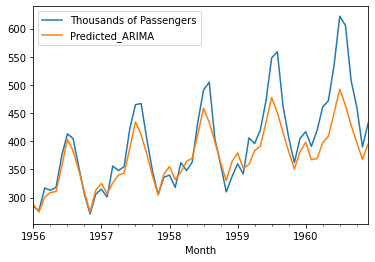

In [357]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()